## Group 01 :
* Deside Guillaume (39731800)
* Brieuc Conet (11181800)

<font size=5  color=#003366> **[LGBIO2020] - Bioinstrumentation <br><br> 
Project EEG classification : Open your eyes! ** </font> <br><br><br>

<font size=5  color=#003366>
Prof. M. Verleysen<br>
Prof. A. Moureaux<br>

<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
<div style="text-align: right"> Version 2021 </div>
<br><br>
</font>

<font size=5 color=#009999> <b>GLOBAL CONTEXT </b> <br>
DEFINITION OF EEG CLASSIFICATION 
</font> <br> <br>

The aim of this project is to distinguish short segments of an EEG signal recorded in a subject whose eyes are either closed or open. In other words, you will train a binary classifier taking as input (features extracted from) a 500 ms EEG signal and for wich the prediction is the state of the subject (either eyes closed or open). To reach this goal, you will work on a real dataset recoded in the laboratory of Woluwe. Unforntunately, the data recorded this year during the EEG+TMS lab are not usable for this project due to recording issues. You will have to work on other recordings.</b> <br>

You will have to pre-process the obtained dataset, extract relevant features and finally tackle the classification task. Some guidelines are given along this notebook. <b>You are allowed, and even encouraged, to skip/modify some of the proposed steps, as long as you provide some justifications. The comments/justifications that you will provide are crutial for this project! Writing code is not enough: You have to explain why you have taken your decisions.</b> <br>

In addition to this notebook, you are asked to  <b>write a report (pdf file - max. 5 pages, appendices are allowed) documenting all the choices that you have made regarding the processing steps. You should also present and comment your main results. </b> Do not hesitate to consult books or internet ressources. This is allowed to use them to answer the questions as long as you cite your references.


<br>

<img src="imgs/GeneralContext.jpg" width = "600">

The context of this project is illustrated in the figure above <sup>[1](https://scielo.conicyt.cl/scielo.php?script=sci_arttext&pid=S0716-97602007000500005) </sup>. First, you will be asked to extract segments of 500 ms out of the recorded EEG waves. During each segment, the state of the subject (eyes open or closed) must be constant. Based on these segments, you will extract some usefull features that will help to summarize the information content in those 500 ms signals. Then, you will train a classifier to predict whether a given new segment belongs to the "eyes open" or the "eyes closed" class. You will have to predict the performances you can obtain with this classification model.
<br><br>


<font size=5 color=#009999> <b> STRUCTURE OF THE PROJECT </b> <br>
WHAT ARE THE MAIN STEPS?
</font> <br> <br>

The project is divided into three parts : Data Precprocessing, Feature Extraction and Classification. Those are illustrated in the figure below. 

   - In the first step, you will have to convert the entire recorded signal into segments that correspond either to the eyes closed or eyes open condition. During this phase, you will perfom basic signal processing operation to clean you data and make the classification easier. 
   - Then, based on the segments you have constructed, you will represent each of them by a concatenation of features. The idea is to decrease the dimensionality of the data to be handled easily by the classifier. They are a multitude ways of working. Be creative! 
   - Finally, you will train some classification models on your extracted features. You will have to estimate the performances obtained with the models.

<img src="imgs/blockdiagram.png" width = "800">


Note that those operations have been adressed during the three practical sessions. Do not hesitate to base this project on the code/observations you have already made during those sessions. 

<br> 


<font size=5 color=#009999> <b> INSTRUCTIONS </b> <br>
WORK BY GROUP AND DELIVERABLES
</font> <br> <br>

You can discuss about the project with other students, but your work has to be implemented either individually or in groups of two. You must submit on Moodle an archived folder containing:
   
   - Your notebook file with (at least) your codes and (eventually) small remarks. If it is necessary, you can join a README.txt file explaining how to run your codes. The results presented in your report should be reproducible with these codes. Make sure that we can compile them properly (for instance if you used a different toolbox than the ones provided on Moodle, you should include the associated files in your submission).
   - A pdf report of maximum 5 pages that presents your results and justifies your choices. You can write it in English or in French. This report is very important! Do not neglet the writing. It is recommended to illustrate and comment as much as possible your results (when it applies).
   
Don’t forget to mention the name(s) of the author(s) in the notebook and in the report.

<br><br>


<font size=6 color=#009999> <center><b>PART I - DATA PREPROCESSING </b></center> </font> <br> <br>

<font size=5 color=#009999> <b>GENERAL INFORMATION </b> <br>
HOW ARE THE DATA STORED?
</font> <br> <br>

The EEG signal on which we are working have been recorded in the Wolluwe's laboratory. These signals are stored in the file <samp>EEG_data.csv</samp>. This dataset includes 32 recording channels of scalp electrodes in the following order:

$$ ch\_names = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'CZ', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'PZ', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2'] $$
<img src="imgs/eeg_1020.png" width = "300">

The file has a $t \times ch$ dimension, where $t$ is the number of recorded time steps and $ch$ is the number of electrodes).

The sampling rate of these recordings is 1000Hz.

In addition, the file <samp>target.csv</samp> contains a $t \times 1$ vector indicating the condition of the subject for each time step. Its entries ∈ {0, 1, NaN} correspond to:
   - 1: an eye-closed state
   - 0: an eye-open state
   - NaN: an additional unlabeled time step
   
<div class="alert alert-warning">
<b>[Question 1] Import the data and visualize them</b>  <br>
Import the signal stored in the <samp>EEG_data.csv</samp> and <samp>target.csv</samp>. As usually in a machine learning process, a simple data visualization step will help you to understand the nature of the task. You can use the <samp>ecg_plot</samp> provided in the TP1 or any other provided function. Of course, you can modify this code if you want. For example, you may find a way to integrate the target value on your plot.
</div> 

<div class="alert alert-info">
<b>[Remark] Do not display all your plots in the notebook </b>  <br>
Especially in the early stage of the project, you will produce a lot of graphs to validate what you are doing. Showing all of them in the notebook can take a huge amount of space. The, you can save them in a separate folder (in the same location as you notebook file) to look at them. This is done with the <samp>file_path</samp> argument of the visualization functions provided in previous practical sessions.
</div> 

In [1]:
import numpy as np
import pandas as pd
from make_graphs import *
from matplotlib import pyplot as plt

### General informations

In [2]:
ch_names = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 
                                    'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'CZ', 'C4', 'T8', 
                    'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'PZ', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']
freq_acquisition = 1000

### Read Data

In [3]:
EEG_data = pd.read_csv("../../Data/EEG_data.csv").T
EEG_data_numpy = EEG_data.to_numpy() #(32,655456)

target = pd.read_csv("Data/target.csv").T
target_numpy = target.to_numpy()[0] #(655456,)


time = np.arange(0,EEG_data.shape[1]*1/freq_acquisition,1/freq_acquisition)

time_signals =np.concatenate([[time],EEG_data_numpy],axis=0)

### Visualization

We can observe below the EEG with no processing. As can be seen, a temporal representation without any processing does not always allow for pattern recognition in the two situations, especially for inexperienced people. So preprocessing and features extraction are necessary.

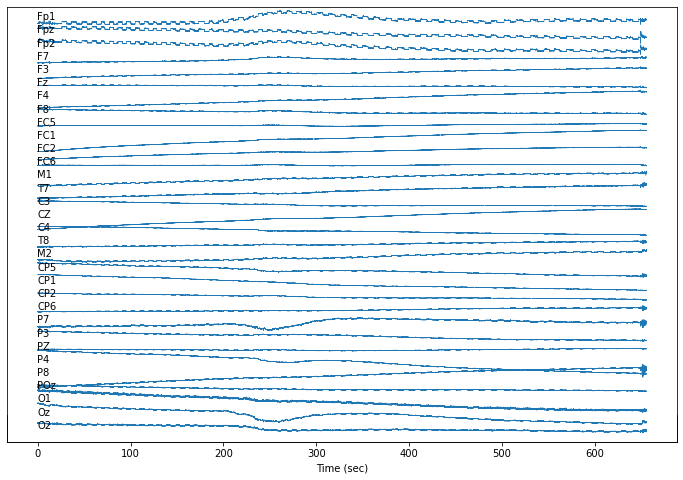

In [7]:
eeg_plot(time_signals,ch_names,True,"figures/eegplot.png")

<font size=5 color=#009999> <b>PREPROCESSING </b> <br>
DO YOU WANT TO CLEAN YOUR DATA?
</font> <br> <br>

Before trying to classify the different EEG segments, you may consider some pre-processing steps aiming to remove as much as possible the undesirable components in your signals. For this part, visual inspection of your signals in the time and frequency domains can be very useful. Hereunder are some suggestions that you may consider.

Some pre-processing steps are better carried out on the entire continuous data, when they are intended to remove noise affecting the whole recording. For instance:
   - you can band-pass/high-pass/low-pass filter your multi-channel EEG. Applying frequency filters before segmenting the signal is recommended to avoid including too much border effects. The purpose of this step is to only keep the frequencies that can be relevant from a physiological point of view (you may also remove the noise induced by the power line). Which frequency range do you consider? Justify with data visualization, physiological reasons,....
   
   - reject some electrodes (this step can also be performed on the segmented data). You can detect, for instance by visual inspection, whether some electrodes seem to be noisy. If you remove some electrodes, give their names and justify your decisions.
   
   - perform an ICA to filter out specific noise components (if you see any). As a reminder, if $X\in \mathbb{R}^\text{n_chan} \times \text{n_time} $ denotes the EEG signals, ICA computes an estimate $A$ of the mixing matrix such that
	$$ X  = A\cdot S = \sum\limits_{i = 1}^{\text{n_sources}} A_{:i}\cdot S_{i:} $$
	 where $S$ is the matrix containing the time courses of the estimated sources (one source per row), $S_{i:}$ is its $i^{\text{th}}$ row and $A_{:i}$ the $i^{\text{th}}$ column of the mixing matrix. Therefore, it is straightforward to remove the contribution of some given sources which are supposed to reflect noise ICs by re-mixing the other ICs. Note that IC $i$ has a constant *spatial pattern* given by $A_{:i}$.
     
<div class="alert alert-warning">
<b>[Question 2] Clean your data </b>  <br>
Decide wether or not you want to preprocess you data. Explain and comment why you made this choice and why you chose a specific method among other. Provide detailed answers!
</div> 

### Reject some electrodes

Some electrodes may be worthless in the case of our EEG classifier. So it is worth investigating the signal of each electrode with the target to see if we can delete it from the dataset. Before removing an electrode, we also take account of its localization. We know that the visual cortex (that is the part of the brain that interests us more) is located in the occipital lobe.

#### Visualization channels with target

Figure are in the folder "figures/target"

In [8]:
eeg_target_plot(EEG_data_numpy,target_numpy,ch_names,time) #function in make_graphs

We removed the signals from the following electrodes in our initial dataset: FC1, FC2, and CZ. We did not remove any more electrodes since we would rather have too many than not enough.

In [4]:
ch_names_kept = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 
                                    'FC5', 'FC6', 'M1', 'T7', 'C3', 'C4', 'T8', 
                    'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'PZ', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

#### Creation of the new dataset

In [5]:
new_EEG_numpy = np.zeros((len(ch_names_kept),np.shape(EEG_data_numpy)[1]))

j = 0
for i in range(32):
    if( ch_names[i] in ch_names_kept):
        new_EEG_numpy[j] = EEG_data_numpy[i]
        j += 1

#new_EEG_frame = pd.DataFrame(new_EEG_numpy)
#new_EEG_frame.to_csv("../../Data/new_EEG_data.csv", index=False)
print(np.shape(new_EEG_numpy))

(29, 655456)


### Frequential analysis

The observed EEG in Part I appears to have noise to us. So we started to investigate the Fourier transform of signals.

#### All signals

Frequential analysis for all channels (even removed channels). Figures are in the folder "figures/frequential"

In [8]:
eeg32_freq_plot(EEG_data_numpy,ch_names,freq_acquisition) #function in make_graphs

#### One signal (Fp1)

Frequential analysis for the first channel (Fp1).

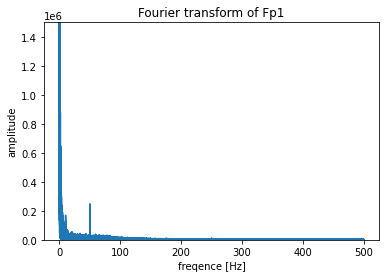

In [9]:
signal_freq = np.fft.fftshift(np.fft.fft(EEG_data_numpy[0]))
signal_freq_abs = np.fft.fftshift(np.fft.fftfreq(signal_freq.size,d=1/freq_acquisition))
plt.plot(signal_freq_abs[(len(signal_freq_abs)//2):],(np.abs(signal_freq[(len(signal_freq_abs)//2):])))
plt.ylim(0,150e4)
plt.xlabel('freqence [Hz]')
plt.ylabel('amplitude')
plt.title("Fourier transform of Fp1")
plt.savefig("figures/frequential/signal_freq_single.png")
plt.show()

When we look at Fourier transform of Fp1 signal and all signals, we can observe a noise component of 50 Hz coming from digital equipment of measure. We must filter signals. For that we use DWT.

### DWT filtering

Since we use DWT to filter, we decided to filter also the delta’s and gamma’s waves because they do not bring any information in our specific case (based on our knowledge). In table 2 in the report, you can find the specific frequency bands used for EEG frequency spectrum analysis.

In [6]:
import pywt

In [7]:
EEG_data_numpy_wavelet = np.zeros(np.shape(new_EEG_numpy))

for i in range(len(ch_names_kept)):
    coeff = pywt.wavedec(EEG_data_numpy[i], 'db4', level=7)
    new_coeff = []
    new_coeff.append(np.zeros(len(coeff[0])))
    for j in range(3):
        new_coeff.append(coeff[j+1])
    for j in range(4):
        new_coeff.append(np.zeros(len(coeff[j + 4])))
    EEG_data_numpy_wavelet[i] = pywt.waverec(new_coeff, 'db4')

print(np.shape(EEG_data_numpy_wavelet))

(29, 655456)


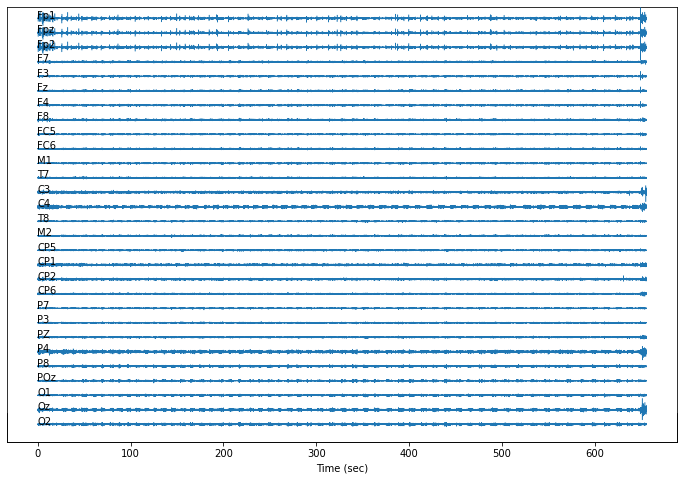

In [12]:
time_signals = np.concatenate([[time], EEG_data_numpy_wavelet], axis=0)

eeg_plot(time_signals, ch_names_kept, True, "figures/eeg_wavelet.png")

### Frequential analysis after filtering

We observe that the component at 50 Hz does not appear anymore.

#### Comparison of one signal (Fp1)

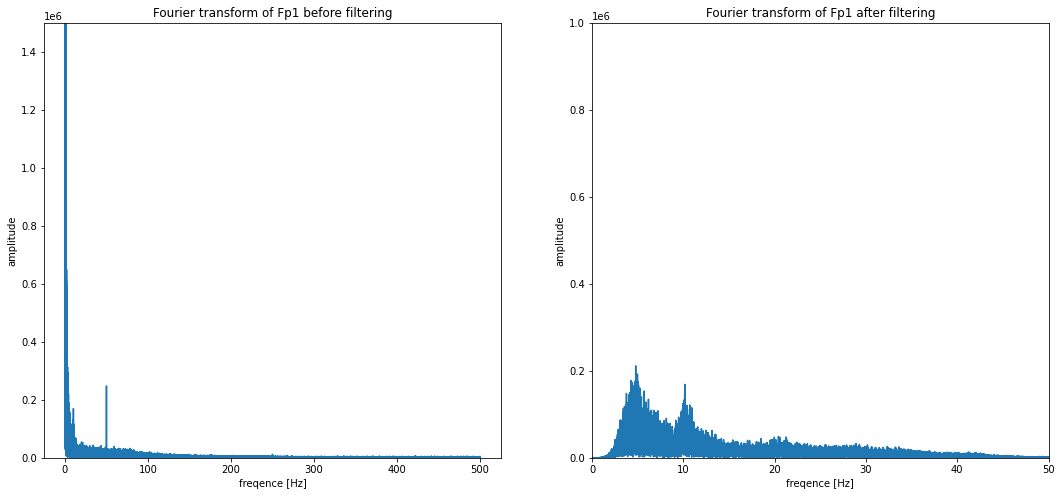

In [8]:
fig, axs = plt.subplots(1, 2,figsize=(18,8))


signal_freq = np.fft.fftshift(np.fft.fft(EEG_data_numpy[0]))
signal_freq_abs = np.fft.fftshift(np.fft.fftfreq(signal_freq.size,d=1/freq_acquisition))
axs[0].plot(signal_freq_abs[(len(signal_freq_abs)//2):],(np.abs(signal_freq[(len(signal_freq_abs)//2):])))
axs[0].set_ylim(0,150e4)
axs[0].set_xlabel('freqence [Hz]')
axs[0].set_ylabel('amplitude')
axs[0].set_title("Fourier transform of Fp1 before filtering")

signal_freq_1 = np.fft.fftshift(np.fft.fft(EEG_data_numpy_wavelet[0]))
signal_freq_abs_1 = np.fft.fftshift(np.fft.fftfreq(signal_freq_1.size,d=1/freq_acquisition))

axs[1].plot(signal_freq_abs_1[(len(signal_freq_abs_1)//2):],(np.abs(signal_freq_1[(len(signal_freq_abs_1)//2):])))
axs[1].set_ylim(0,1e6)
axs[1].set_xlim(0,50)
axs[1].set_xlabel('freqence [Hz]')
axs[1].set_ylabel('amplitude')
axs[1].set_title("Fourier transform of Fp1 after filtering")

fig.savefig("figures/frequential/signal_freq_w_single_comparison.png")
plt.show()

#### Comparison of all signals

Frequential analysis for all channels (even removed channels). Figures are in the folder "figures/frequential"

In [9]:
comparison_filtering_plot(EEG_data_numpy,EEG_data_numpy_wavelet,freq_acquisition,ch_names_kept) #function in make_graphs

<font size=5 color=#009999> <b> CONSTRUCT YOUR TRAINING SAMPLES </b> <br>
SEGMENT THE SIGNALS INTO SHORT SEGMENTS
</font> <br> <br>

Based on the vector target, you are asked to construct segments of 500 ms. One segment should correspond to a signal recorded either in eyes open or eyes closed condition. 

You can now take other choices : 
   -  since the subject was asked to close or open her eyes at the beginning of each segment, there should be a time lag between the beginning of each segment and the actual moment when the subject’s state change. Do you observe the state changes? Illustrate. If the state change always occurs after around $x$ seconds, you should discard the first $x$ seconds after any target change when constructing the segments.
   - you may remove the DC trend.
   - reject some segment if you think that they are too noisy, based on visual inspection in the time and/or frequency domains. Explain why it is preferable to (not) remove segments from your dataset. If you reject some segments, illustrate.
   - you can re-reference the signals (=modify manually the target value that has been assigned). If you decide to do so, which reference do you choose? Why?
   
Do not hesitate to consider different or additional denoising techniques. Justify your choices.
   
<div class="alert alert-warning">
<b>[Question 3] Segment your data </b>  <br>
Segment the entire time signal into short segments of 500 ms. Each segment will constitue one training/validation/test sample of your final dataset. Justify if you decided to implement one of the propositions above.
</div> 

To construct a training sample, we must divide data by segments of 500 ms.

### Remove NaN

First, we remove from the dataset data where the target was NaN because these data are useless for our classifiers.

In [8]:
EEG_data_numpy_deleted = np.delete(EEG_data_numpy_wavelet,np.argwhere(np.isnan(target_numpy)),1)
target_numpy_deleted = np.delete(target_numpy,np.argwhere(np.isnan(target_numpy)),0)
print(EEG_data_numpy_deleted.shape)
print(target_numpy_deleted.shape)

(29, 626637)
(626637,)


The dataset decrease of 28819.

### Deal with dealy

The second thing we did was examine the latency to see whether there was a change in the EEG when the target changed from 0 to 1 or vice versa.
Figures are in the folder "figures/delay"

In [9]:
delay_plot(EEG_data_numpy[0],target_numpy,time) #function in make_graphs

On the graphs, we can see that there is a delay before we see a change in the EEG. These values may have an adverse effect on our classifiers. To prevent the effect of this data on the classifier, we opted not to maintain values 1500 ms before and after a change in the target value.

### Dataset with segment and data augmentation

The risk after the first two steps is that we do not have enough data to build robust classifiers.. So, to increase the number of 500 ms segments, we create oversampling segments. This data augmentation allows for the reduction of overfitting and the stabilization of classifiers.

In [9]:
### allow to know where there is a change in the target
where_changement = []
for i in range(0,len(target_numpy_deleted)-1):
    if target_numpy_deleted[i] != target_numpy_deleted[i+1]:
        where_changement.append(i)
print("Number of changes in target: "+str(len(where_changement)))

Number of changes in target: 108


In [10]:
to_keep = np.array([], dtype=int) #data keep for the new dataset
count = 0
for i in range(0, len(target_numpy_deleted) - 500, 100): # step of 100 for oversampling
    if np.min(target_numpy_deleted[i:i + 500]) == np.max(target_numpy_deleted[i:i + 500]):
        ok = True
        for j in where_changement:
            if (j - 1500 < i < j + 1500) or (j - 1500 < i + 500 < j + 1500):
                ok = False
        if ok:
            to_keep = np.append(to_keep, np.arange(i, i + 500, 1))
            count += 1
print("Number of segment of 500 ms : "+str(count))

Number of segment of 500 ms : 2483


In [11]:
EEG_data_numpy_deleted = np.take(EEG_data_numpy_deleted, to_keep, 1)
target_numpy_deleted = np.take(target_numpy_deleted, to_keep, 0)
print(len(target_numpy_deleted))
print(np.shape(EEG_data_numpy_deleted))

1241500
(29, 1241500)


In [12]:
## allow checking if no problem
count = 0
for i in range(0, np.shape(EEG_data_numpy_deleted)[1] - 500, 500):
    if np.max(target_numpy_deleted[i:i+500])!=np.min(target_numpy_deleted[i:i+500]):
        count +=1
print(count)

0


<br><br>

<font size=6 color=#009999> <center><b>PART II - FEATURE EXTRACTION </b></center> </font> <br> <br>

<font size=5 color=#009999> <b>GENERAL INFORMATION </b> <br>
WHAT CAN BE CONSIDERED?
</font> <br> <br>

To be able to classify your EEG segments, you must define the features on which you will apply the classification algorithms. These features should somehow summarize as best as possible the ‘useful’ information contained in an EEG segment.
   - A first idea is to keep as features all the amplitudes of the EEG signals. However, this technique may have some drawbacks. For instance, you will end up with $ch \times t$ features. How does this number compare with the number of available segments to classify? What do you think about using such features?
   - Another option is to consider the power of a relevant subset of the channels in different physiological frequency bands. In this case, you will have $n\_selected\_chan \times n\_freq$ features, where n_freq is the number of frequency bands considered. Why would such features be sound?
   
Feel free to consider different features as well. Do not forget to give and comment their definition in the report.

<div class="alert alert-info">
<b>[Remark] Look at your data </b>  <br>
It is often a good idea to try visualizing the extracted features. A first simple way to do so is to plot the mean of each feature in both classes: do you observe some differences? Was it expected, from a physiological point of view? Is it necessary to keep all the defined features? Do you identify different ‘kinds of channels’ that can both be helpful for the classification, but reflecting different physiological mechanisms? Explain which channels you consider and why.
</div>

The feature extraction may be followed by a feature selection step. You can follow the method(s) proposed during the third practical session (on classification algorithms).

<div class="alert alert-warning">
<b>[Question 4] Create your feature space </b>  <br>
Explain your methodology to create relevant features out of the segments you have obtained before.
</div> 

After the segmentation of our initial data, we must create the database used in the classifier. For that, we must lower the size of the training set. We have $2483 \times 500\times 29$. There are several options for doing so. We choose to calculate the total powers (Equation below) for each kept sub-band ($\alpha$,$\beta$,$\theta$).

\begin{equation}
     P(k) = \lvert X(k) \rvert ^{2}
     \label{equation:puissance}
\end{equation}

In [13]:
lst_onde = [(4, 8), (8, 13), (13, 25)]
lst_onde_name = ["alpha", "beta", "theta"]

EEG_data_segmented_numpy = np.zeros(
    (np.shape(EEG_data_numpy_deleted)[1] // 500, np.shape(EEG_data_numpy_deleted)[0] * len(lst_onde)))
target_segmented_numpy = np.zeros(np.shape(EEG_data_numpy_deleted)[1] // 500)

features_name = []
for i in ch_names_kept:
    for j in lst_onde_name:
        features_name.append(i+"_"+j)

for i in range(0, np.shape(EEG_data_numpy_deleted)[1] - 500, 500):
    for j in range(np.shape(EEG_data_numpy_deleted)[0]):
        signal_freq = np.fft.fftshift(np.fft.fft(EEG_data_numpy_deleted[j, i:i + 500]))
        signal_freq_abs = np.fft.fftshift(np.fft.fftfreq(signal_freq.size, d=1 / freq_acquisition))
        for z in range(len(lst_onde)):
            index = np.where((signal_freq_abs >= lst_onde[z][0]) & (signal_freq_abs < (lst_onde[z][1])))
            EEG_data_segmented_numpy[i // 500, (len(lst_onde)) * j + z] = np.sum(np.power(np.abs(signal_freq[index]), 2))
    target_segmented_numpy[i // 500] = target_numpy_deleted[i]
    
    

print("New dimension of dataset: "+str(EEG_data_segmented_numpy.shape))


New dimension of dataset: (2483, 87)


In [14]:
to_keep_0 = np.array([],dtype = int)
to_keep_1 = np.array([],dtype = int)
for i in range(len(target_segmented_numpy)):
    if target_segmented_numpy[i] == 0:
        to_keep_0 = np.append(to_keep_0,i)
    else:
        to_keep_1 = np.append(to_keep_1,i)
print("Number of 1 is {}".format(len(to_keep_1)))
print("Number of 0 is {}".format(len(to_keep_0)))

Number of 1 is 1311
Number of 0 is 1172


We obtain a new dataset (2487x87). This will be the classifier's input. We have 1311 eye-closed states and 1172 eye-open states in our new Dataset. Because there is no significant difference between the numbers 1 and 0, we may divide the set into Training and Test without fear of  having a big difference in the repartition.

<font size=6 color=#009999> <center><b>PART III - PCA/FEATURE SELECTION </b></center> </font> <br> <br>

In signal classification challenges, we know that the training time increases exponentially with number of features. Resources need also to be allocated for uninformative features. It can be interesting to reduce the number of features by creating new features from the existing ones (PCA) or by selecting subset of relevant features for processing, without any transformation(feature selection).

<font size=5 color=#FF0000>
⚠ To reduce the number of features, just one of two techniques may be used (PCA or feature selection), not both.
If you wish to modify a parameter, such as n_components in PCA, or change the methodologie, you must restart from Normalization.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing

### Normalization

In [16]:
X_train, X_test, y_train, y_test = train_test_split(EEG_data_segmented_numpy, target_segmented_numpy, test_size=0.1)

In [17]:
print("size of training set : " + str(len(X_train)))
print("size of test set : " +str(len(X_test)))

size of training set : 2234
size of test set : 249


In [18]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### PCA

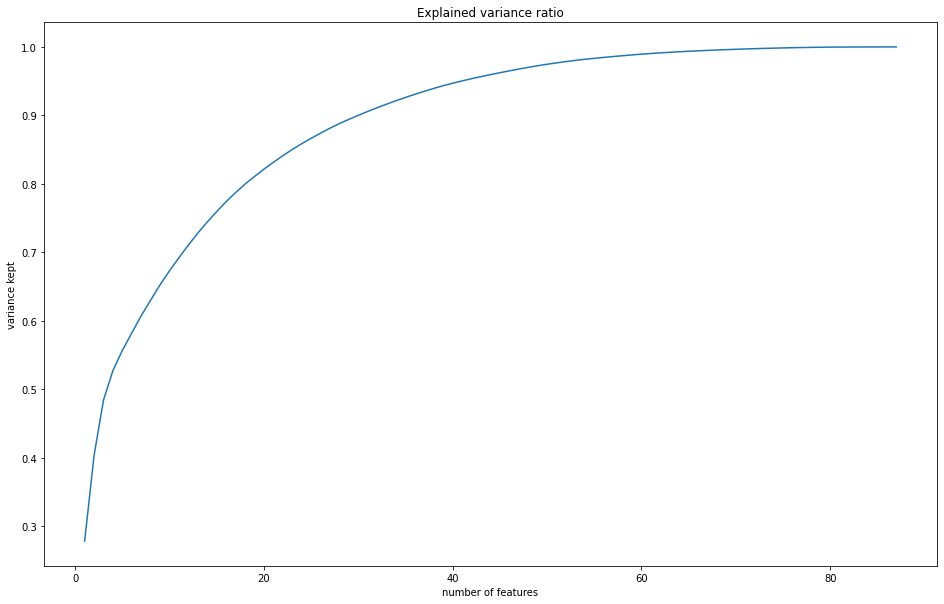

In [19]:
pca = PCA()
pca.fit(X_train)

featuresN = np.arange(1, np.shape(EEG_data_segmented_numpy)[1] + 1, 1)  # Number of features
cum_sum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(16,10))
plt.plot(featuresN, cum_sum)
plt.ylabel("variance kept")
plt.xlabel("number of features")
plt.savefig("figures/pca.png")
plt.title("Explained variance ratio")
plt.show()

To know how feature, we must keep, we use cumulative sum of explained variance ratio (figure above). It seems to us important to compare different feature selections. We obtained results for 4 numbers of features: 15, 20, 32 and 45.

In [20]:
print('Kept variance: %.2f'%cum_sum[2])

Kept variance: 0.48


In [21]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [22]:
print(np.shape(X_train))
print(np.shape(X_test))

(2234, 2)
(249, 2)


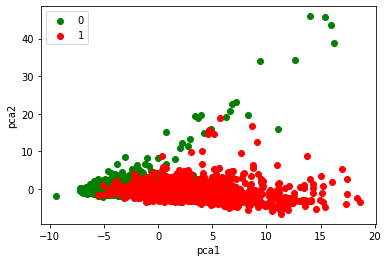

In [23]:
#only for nb_features = 2
zero_lst = []
one_lst  = []
for i in range(len(X_train)):
    if y_train[i] == 0:
        zero_lst.append(i)
    else :
        one_lst.append(i)

plt.scatter(X_train[:,0][zero_lst],X_train[:,1][zero_lst],c="green",label="0") 
plt.scatter(X_train[:,0][one_lst],X_train[:,1][one_lst],c="red",label="1")
plt.legend()
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

### Feature selection

In [102]:
EEG_data_segmented_frame = pd.DataFrame(X_train,columns=features_name)

EEG_data_segmented_frame['Target'] = y_train

lst_corr = EEG_data_segmented_frame.corrwith(EEG_data_segmented_frame["Target"])

no_keep = []
for n,i in zip(range(len(features_name)),lst_corr):
    if(abs(i)<0.70):#here to change >threshold correlation
        no_keep.append(n)


print(no_keep)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86]


In [124]:
for k in no_keep:
    if k%3 == 0:
        print(features_name[k],end =" ")
    elif k%3 == 1:
        print(features_name[k],end =" ")
    else:
        print(features_name[k])

Fp1_alpha Fp1_beta Fp1_theta
Fpz_alpha Fpz_beta Fpz_theta
Fp2_alpha Fp2_beta Fp2_theta
F7_alpha F7_beta F7_theta
F3_alpha F3_beta F3_theta
Fz_alpha Fz_beta Fz_theta
F4_alpha F4_beta F4_theta
F8_alpha F8_beta F8_theta
FC5_alpha FC5_beta FC5_theta
FC6_alpha FC6_beta FC6_theta
M1_alpha M1_beta M1_theta
T7_alpha T7_beta T7_theta
C3_alpha C3_beta C3_theta
C4_alpha C4_beta T8_alpha T8_beta T8_theta
M2_alpha M2_beta M2_theta
CP5_alpha CP5_beta CP5_theta
CP1_alpha CP1_beta CP1_theta
CP2_alpha CP2_beta CP2_theta
CP6_alpha CP6_beta CP6_theta
P7_alpha P7_beta P7_theta
P3_alpha P3_beta P3_theta
PZ_alpha PZ_beta PZ_theta
P4_alpha P4_beta P4_theta
P8_alpha P8_beta P8_theta
POz_alpha POz_beta POz_theta
O1_alpha O1_beta O1_theta
Oz_alpha Oz_theta
O2_alpha O2_beta O2_theta


In [103]:
X_train = np.delete(X_train,no_keep,1)

In [104]:
X_test = np.delete(X_test,no_keep,1)

In [105]:
print(np.shape(X_train))

(2234, 2)


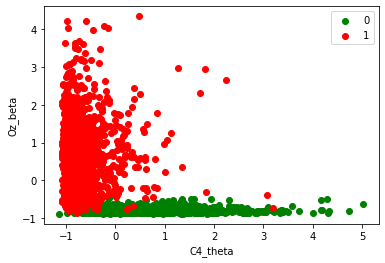

In [125]:
zero_lst = []
one_lst  = []
for i in range(len(X_train)):
    if y_train[i] == 0:
        zero_lst.append(i)
    else :
        one_lst.append(i)

plt.scatter(X_train[:,0][zero_lst],X_train[:,1][zero_lst],c="green",label="0") #only for nb_features = 2
plt.scatter(X_train[:,0][one_lst],X_train[:,1][one_lst],c="red",label="1")
plt.legend()
plt.xlabel("C4_theta")
plt.ylabel("Oz_beta")
plt.show()

Like expected,

<br><br>

<font size=6 color=#009999> <center><b>PART IV - CLASSIFICATION </b></center> </font> <br> <br>

<font size=5 color=#009999> <b>GENERAL INFORMATION </b> <br>
WHAT CAN BE CONSIDERED?
</font> <br> <br>

In order to assess whether the features defined above allow to discriminate between the two conditions (eyes closed or open), you will use classification algorithms. For this task, you are advised to follow the instructions given for the third practical session. In particular, you should consider using a K-Fold cross validation to evaluate your classifiers.
You are asked to use at least two classifiers among the following ones:
   - K-nearest neighbors (kNN)
   - Decision tree
   - Neural network
   - SVM
   
<div class="alert alert-warning">
<b>[Question 5] Evalueate your classifier </b>  <br>
Report the performances obtained with your classifiers (in terms of accuracy) and give some comments. Give also the hyper-parameters of your algorithms (e.g. number of neurons for mlp, kernel for SVM) and explain how you choose them. You can compare the classification accuracies obtained using different feature sets. For instance, do you obtain better results if you perform a dimensionality reduction (e.g. using PCA) before? (Or if you only use a subset of your features?)
</div> 

We decide to compare results for four different classifiers for this project :
* K-nearest neighbours (kNN)
* Decision tree
* Neural network (MLP)
* Support Vector Machine (SVM)

In order to find the best hyperparameters of each classifier, we use GridSearchCV from sklearn. We use the parameter \textit{cv} to make K-fold Cross Validation. For our purposes, we used 10-fold cross-validation to train and test extracted features for all classifiers.\\
After finding the best hyperparameters, me measured classifier performance with the accuracy on the test set.

In [24]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV ## for hyperparameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#### MLP

In [29]:
print(np.shape(X_train))

(2234, 2)


In [108]:
MLP = MLPClassifier(max_iter=900)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,),(400,400),(100,10)],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=10)
clf.fit(X_train,y_train)
print('Best parameters found:\n', clf.best_params_)
print('Best score found : %.2f'%clf.best_score_)

Best parameters found:
 {'alpha': 0.0001, 'hidden_layer_sizes': (100, 10), 'learning_rate': 'adaptive'}
Best score found : 0.99


In [109]:
MLP = MLPClassifier(max_iter=900, alpha=0.0001, hidden_layer_sizes=(100, 10),
                    learning_rate='adaptive')
MLP.fit(X_train, y_train)
print("Accuracy of MLP : %.2f" %accuracy_score(MLP.predict(X_test), y_test))

Accuracy of MLP : 0.99


#### SVM

In [37]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,n_jobs=-1, cv=10)
grid.fit(X_train,y_train)
print('Best parameters found:\n', grid.best_params_)
print('Best score found : %.2f'%grid.best_score_)

KeyboardInterrupt: 

In [38]:
svc = SVC(C=1, gamma=1, kernel='poly')
svc.fit(X_train, y_train)
print("Accuracy of SVM : %.2f" % accuracy_score(svc.predict(X_test), y_test))

Accuracy of SVM : 0.92


#### kNN

In [30]:
parameters_KNN = {
    'n_neighbors': (2,3,5,10),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}
grid_search_KNN = GridSearchCV(
    estimator=KNeighborsClassifier(algorithm='auto'),
    param_grid=parameters_KNN,
    cv = 10)
grid_search_KNN.fit(X_train,y_train)
print('Best parameters found:\n', grid_search_KNN.best_params_)
print('Best score found : %.2f'% grid_search_KNN.best_score_)

Best parameters found:
 {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best score found : 0.91


In [35]:
neigh = KNeighborsClassifier(leaf_size=20, metric='minkowski', n_neighbors=10, p=1, weights='uniform')
neigh.fit(X_train, y_train)
print("Accuracy of kNN : %.2f" %accuracy_score(neigh.predict(X_test), y_test))

Accuracy of kNN : 0.91


#### Decision Tree

In [32]:
print(np.shape(X_train))
print(np.shape(y_train))

(2234, 2)
(2234,)


In [33]:
tree_param = {'criterion':['gini','entropy'],
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid_search_Tree = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=10)
grid_search_Tree.fit(X_train,y_train)
print('Best parameters found:\n', grid_search_Tree.best_params_)
print('Best score found : %.2f'% grid_search_Tree.best_score_)

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 4}
Best score found : 0.91


In [36]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_tree.fit(X_train, y_train)
print("Accuracy of Tree decison : %.2f" %accuracy_score(clf_tree.predict(X_test), y_test))

Accuracy of Tree decison : 0.92


#### Results for PCA

| number of features |          |   2  |  15  | 20   | 32   | 45   |
|--------------------|----------|------|------|------|------|------|
| Variance kept      |          | 0.49 | 0.78 | 0.83 | 0.92 | 0.97 |
|                    |          |      |      |      |      |      |
| kNN                | Kfold    | 0.91 | 0.99 | 0.99 | 0.99 | 1.00 |
|                    | Accuracy | 0.91 | 0.99 | 1.00 | 1.00 | 1.00 |
| Decision Tree      | Kfold    | 0.91 | 0.97 | 0.97 | 0.96 | 0.96 |
|                    | Accuracy | 0.92 | 0.98 | 0.97 | 0.96 | 0.96 |
| MLP                | Kfold    |      | 0.99 | 1.00 | 1.00 | 1.00 |
|                    | Accuracy |      | 1.00 | 1.00 | 1.00 | 1.00 |
| SVM                | Kfold    |      | 0.99 | 1.00 | 1.00 | 1.00 |
|                    | Accuracy |      | 0.99 | 1.00 | 1.00 | 1.00 |

#### Results for feature selection

| number of features         |          | 73   | 50   | 25   | 2    |
|----------------------------|----------|------|------|------|------|
| Correlation greater than   |          | 10   | 25   | 50   | 70   |
|                            |          |      |      |      |      | 
| kNN                        | Kfold    | 1.00 | 1.00 | 1.00 | 0.99 |
|                            | Accuracy | 1.00 | 1.00 | 1.00 | 0.99 |
| Decision Tree              | Kfold    | 0.99 | 0.99 | 0.99 | 0.99 |
|                            | Accuracy | 1.00 | 1.00 | 1.00 | 1.00 |
| MLP                        | Kfold    | 1.00 | 1.00 | 1.00 | 0.99 |
|                            | Accuracy | 1.00 | 1.00 | 1.00 | 0.99 |
| SVM                        | Kfold    | 1.00 | 1.00 | 1.00 | 0.99 |
|                            | Accuracy | 1.00 | 1.00 | 1.00 | 0.99 |

Both techniques produce excellent outcomes. This is due to the fact that features allow for a decent separation of the two conditions. When we look at the dataset, we can observe that the sign differs between the two conditions for almost every feature. When the number of features is two, for example, we can notice a decent distinction between two sets of data in the graph. There are several outliers, but they have little effect on the outcome.


# Appendix: our own K-Fold

Before using GridSearchCV, we used our implementation of K-Fold (Kfold_function). The results that we obtained are very similar to those obtained with GridSearchCV. We kept the easiest method to find the best hyperparameters.

In [25]:
def Kfold_function(model, X_set, Y_set, K=10):
    kf = KFold(n_splits=K)
    result = []
    for train_index, test_index in kf.split(X_set):
        X_train_K, X_test_K = X_set[train_index], X_set[test_index]
        Y_train_K, Y_test_K = Y_set[train_index], Y_set[test_index]
        model.fit(X_train_K, Y_train_K)
        #print(model.score(X_test_K, Y_test_K))
        result.append(model.score(X_test_K, Y_test_K))
    return np.mean(result)

### MLP

In [42]:
MLP = MLPClassifier(max_iter=700, activation='tanh', alpha=0.05, hidden_layer_sizes=(100, 100),
                    learning_rate='constant', solver='adam')
print('K-Fold score found : %.2f'%Kfold_function(MLP,X_train,y_train,10))

K-Fold score found : 1.00


### Decision Tree

In [41]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=40)
print('K-Fold score found : %.2f'%Kfold_function(clf_tree,X_train,y_train,30))

K-Fold score found : 0.99


### SVM

In [ ]:
svc = SVC(C=1, gamma=1, kernel='poly')
print('K-Fold score found : %.2f'%Kfold_function(svc,X_train,y_train,10))